# Data Bootcamp Final Project: Click-Through Rate Predictive Model

## Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Fall 2024/Data Bootcamp/final_project/data/train-1000000.csv')

In [6]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,1,0,8330,320,50,761,3,175,100081,23


In [7]:
# script to convert hour to more usable datetime format
def datesplit(originalDate):
    originalDate = str(originalDate)

    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])

    return datetime.datetime(year, month, day, hour)

datesplit(14102915).weekday(), datesplit(14102915).hour # example

(2, 15)

In [8]:
df['weekday'] = df['hour'].apply(lambda x:datesplit(x).weekday())
df['hour'] = df['hour'].apply(lambda x:datesplit(x).hour)
df.drop('id', axis=1, inplace = True)  # it's not relevant for the model to learn click rates.

In [9]:
df.describe()

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.169971,11.267452,1004.968549,0.288466,1.015506,0.332436,18835.759473,318.888112,60.030918,2111.794488,1.432802,226.940103,53163.356361,83.404070,2.601855
std,0.375608,5.953450,1.096112,0.505974,0.527867,0.856103,4966.228494,21.279475,47.174174,610.393836,1.325815,350.944666,49960.216178,70.326773,1.728335
min,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,0.000000
25%,0.000000,6.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,1.000000
50%,0.000000,11.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000,2.000000
75%,0.000000,16.000000,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100088.000000,101.000000,4.000000
max,1.000000,23.000000,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,6.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   click             1000000 non-null  int64 
 1   hour              1000000 non-null  int64 
 2   C1                1000000 non-null  int64 
 3   banner_pos        1000000 non-null  int64 
 4   site_id           1000000 non-null  object
 5   site_domain       1000000 non-null  object
 6   site_category     1000000 non-null  object
 7   app_id            1000000 non-null  object
 8   app_domain        1000000 non-null  object
 9   app_category      1000000 non-null  object
 10  device_id         1000000 non-null  object
 11  device_ip         1000000 non-null  object
 12  device_model      1000000 non-null  object
 13  device_type       1000000 non-null  int64 
 14  device_conn_type  1000000 non-null  int64 
 15  C14               1000000 non-null  int64 
 16  C15               1

In [11]:
print(df.nunique())

click                    2
hour                    24
C1                       7
banner_pos               7
site_id               2651
site_domain           2871
site_category           22
app_id                3157
app_domain             198
app_category            26
device_id           150501
device_ip           555248
device_model          5168
device_type              5
device_conn_type         4
C14                   2243
C15                      8
C16                      9
C17                    420
C18                      4
C19                     66
C20                    163
C21                     60
weekday                  7
dtype: int64


Click rate:  16.9971


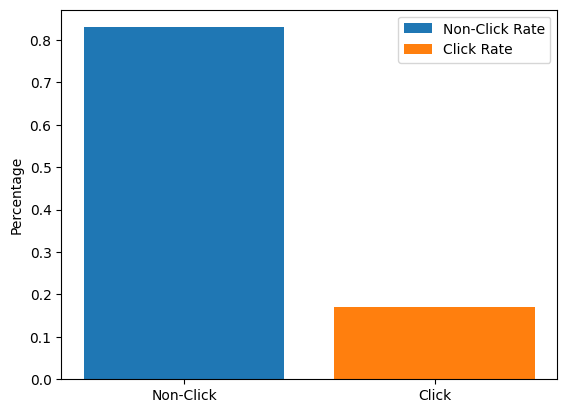

In [12]:
overall_click_rate = df['click'].mean()
print("Click rate: ", overall_click_rate*100)
plt.bar(['Non-Click'], [1 - overall_click_rate], label='Non-Click Rate')
plt.bar(['Click'], [overall_click_rate], label='Click Rate')
plt.ylabel('Percentage')
plt.legend()
plt.show()

### Categorical Features

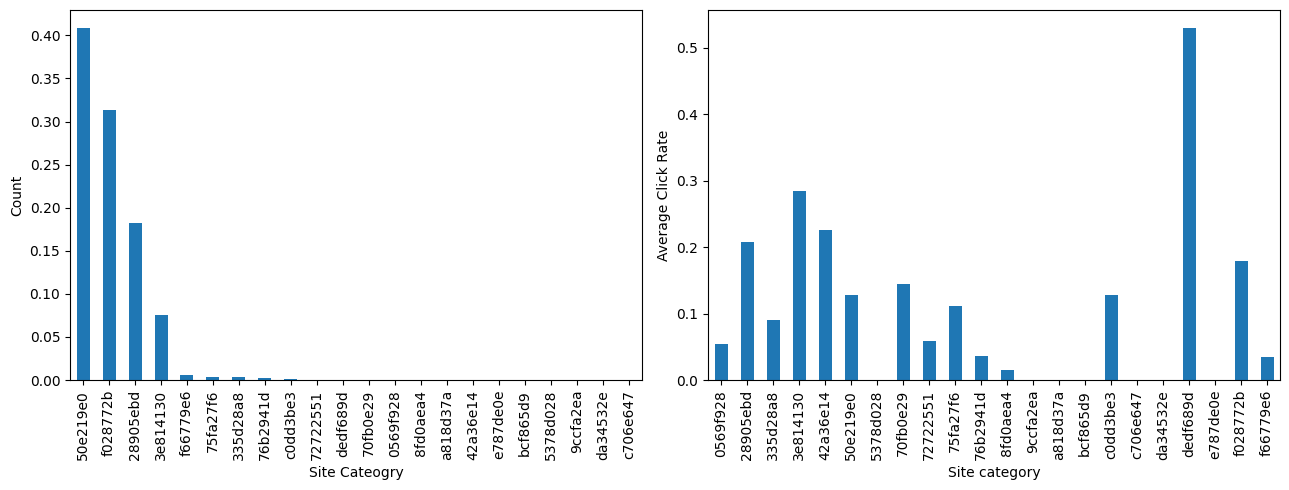

site_category
50e219e0    0.408921
f028772b    0.313339
28905ebd    0.182020
3e814130    0.075667
f66779e6    0.006365
Name: proportion, dtype: float64


In [13]:
site_category_click = (df.groupby(['site_category'])['click'].mean())
site_category_count = df['site_category'].value_counts(normalize=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

site_category_count.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Site Cateogry')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x')

site_category_click.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Site category')
axes[1].set_ylabel('Average Click Rate')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()

print(site_category_count[:5])

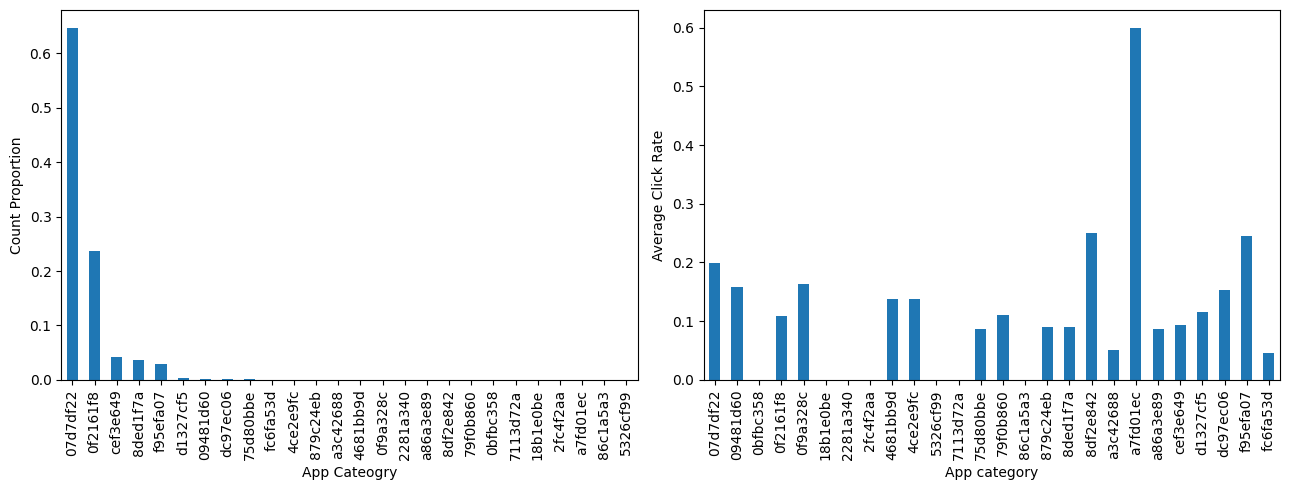

app_category
07d7df22    0.647297
0f2161f8    0.236433
cef3e649    0.042612
8ded1f7a    0.036310
f95efa07    0.028298
Name: proportion, dtype: float64


In [14]:
app_category_click = (df.groupby(['app_category'])['click'].mean())
app_category_count = df['app_category'].value_counts(normalize=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

app_category_count.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('App Cateogry')
axes[0].set_ylabel('Count Proportion')
axes[0].tick_params(axis='x')

app_category_click.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('App category')
axes[1].set_ylabel('Average Click Rate')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()

print(app_category_count[:5])

In [15]:
rest_categorical = ["site_id", "site_domain", "app_id", "app_domain", "device_id", "device_ip", "device_model"]
df[rest_categorical].nunique()

,0
site_id,2651
site_domain,2871
app_id,3157
app_domain,198
device_id,150501
device_ip,555248
device_model,5168


In [16]:
print(df["site_id"].value_counts(normalize = True))

site_id
85f751fd    0.360911
1fbe01fe    0.159924
e151e245    0.065231
d9750ee7    0.024090
5b08c53b    0.022524
              ...   
6ddd2cf1    0.000001
b8c50981    0.000001
54ca087b    0.000001
f25a9574    0.000001
66095cf2    0.000001
Name: proportion, Length: 2651, dtype: float64


In [17]:
print(df["site_domain"].value_counts(normalize = True))

site_domain
c4e18dd6    0.374158
f3845767    0.159924
7e091613    0.082263
7687a86e    0.031858
98572c79    0.024879
              ...   
a6bffa37    0.000001
cd328739    0.000001
b87a3d65    0.000001
8df32dac    0.000001
62ff8594    0.000001
Name: proportion, Length: 2871, dtype: float64


In [18]:
print(df["app_id"].value_counts(normalize = True))

app_id
ecad2386    0.639089
92f5800b    0.038643
e2fcccd2    0.028008
9c13b419    0.018820
febd1138    0.018726
              ...   
2c3336ca    0.000001
ee3d199e    0.000001
276d6d97    0.000001
b8171d73    0.000001
1017e2d5    0.000001
Name: proportion, Length: 3157, dtype: float64


In [19]:
print(df["app_domain"].value_counts(normalize = True))

app_domain
7801e8d9    0.673864
2347f47a    0.129388
ae637522    0.046638
5c5a694b    0.028019
82e27996    0.018727
              ...   
26894d3c    0.000001
bb27eb10    0.000001
6f406d5b    0.000001
1d1d4953    0.000001
a5ab1a9f    0.000001
Name: proportion, Length: 198, dtype: float64


In [20]:
print(df["device_id"].value_counts(normalize = True))

device_id
a99f214a    0.824918
0f7c61dc    0.000512
c357dbff    0.000481
936e92fb    0.000366
afeffc18    0.000242
              ...   
98fcb9ef    0.000001
ceb4ddfc    0.000001
0eabc47f    0.000001
4c6417bb    0.000001
aab31253    0.000001
Name: proportion, Length: 150501, dtype: float64


In [21]:
print(df["device_ip"].value_counts(normalize = True))

device_ip
6b9769f2    0.005130
431b3174    0.003291
2f323f36    0.002197
930ec31d    0.002196
285aa37d    0.002181
              ...   
9a34079d    0.000001
d78c2be9    0.000001
68b28485    0.000001
ea9c002b    0.000001
3ca7f719    0.000001
Name: proportion, Length: 555248, dtype: float64


In [22]:
print(df["device_model"].value_counts(normalize = True))

device_model
8a4875bd    0.060790
1f0bc64f    0.035103
d787e91b    0.034780
76dc4769    0.018663
be6db1d7    0.018357
              ...   
0bbd5ecd    0.000001
4b0d3c7e    0.000001
52b9ae0f    0.000001
e207ef57    0.000001
78cd4bd4    0.000001
Name: proportion, Length: 5168, dtype: float64


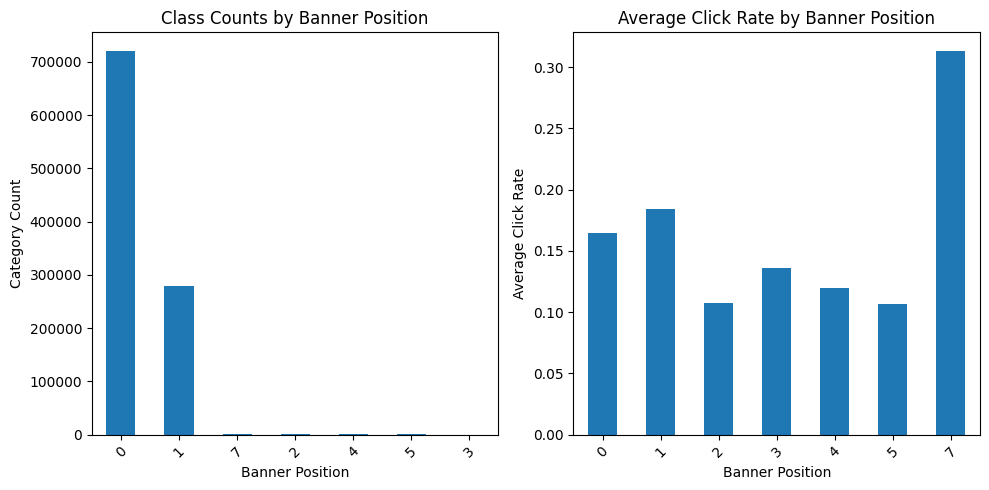

In [23]:
banner_pos_count = df['banner_pos'].value_counts()
banner_pos_click = df.groupby(['banner_pos'])['click'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

banner_pos_count.plot(kind='bar', ax=axes[0])
axes[0].set_title('Class Counts by Banner Position')
axes[0].set_xlabel('Banner Position')
axes[0].set_ylabel('Category Count')
axes[0].tick_params(axis='x', rotation=45)

banner_pos_click.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Click Rate by Banner Position')
axes[1].set_xlabel('Banner Position')
axes[1].set_ylabel('Average Click Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [24]:
device_type_count = df['device_type'].value_counts()
device_type_click = df.groupby(['device_type'])['click'].mean()

print(device_type_count)
print(device_type_click)

device_type
1    922683
0     54907
4     19224
5      3185
2         1
Name: count, dtype: int64
device_type
0    0.211157
1    0.169329
2    0.000000
4    0.096546
5    0.089168
Name: click, dtype: float64


In [25]:
device_conn_type = df['device_conn_type'].value_counts()
device_conn_type_click = df.groupby(['device_conn_type'])['click'].mean()

print(device_conn_type)
print(device_conn_type_click)

device_conn_type
0    862492
2     82186
3     54273
5      1049
Name: count, dtype: int64
device_conn_type
0    0.181407
2    0.135279
3    0.043558
5    0.025739
Name: click, dtype: float64


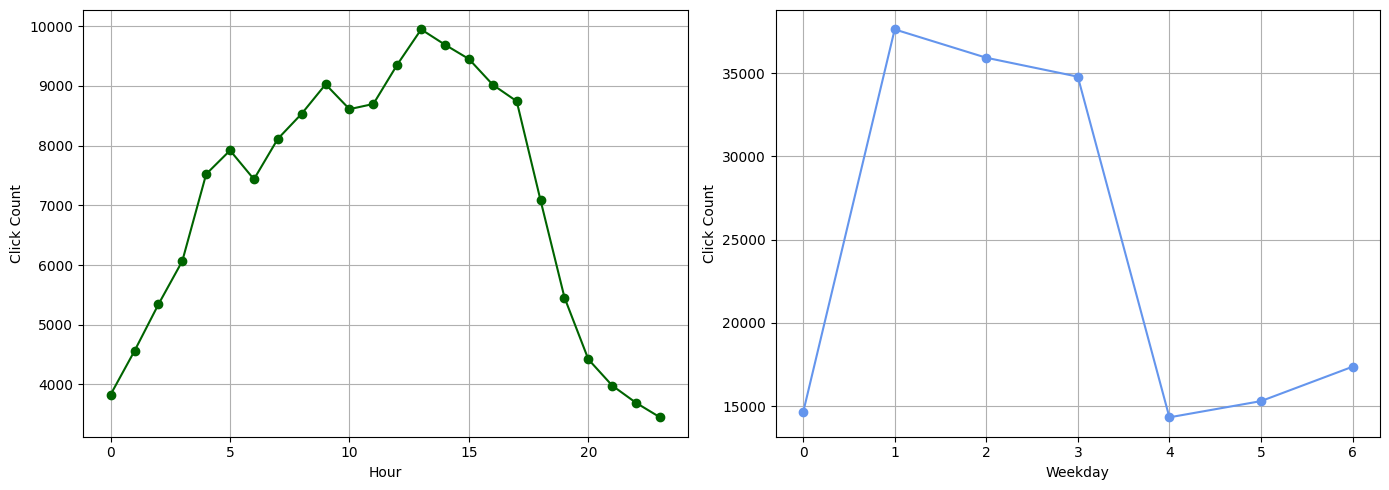

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

clicks_by_hour = df[df['click'] == 1]['hour'].value_counts().sort_index()
axes[0].plot(clicks_by_hour.index, clicks_by_hour.values, linestyle='-', marker='o', color='darkgreen')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Click Count')
axes[0].grid(True)

clicks_by_weekday = df[df['click'] == 1]['weekday'].value_counts().sort_index()
axes[1].plot(clicks_by_weekday.index, clicks_by_weekday.values, linestyle='-', marker='o', color='cornflowerblue')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Click Count')
axes[1].grid(True)

plt.tight_layout()
plt.show()

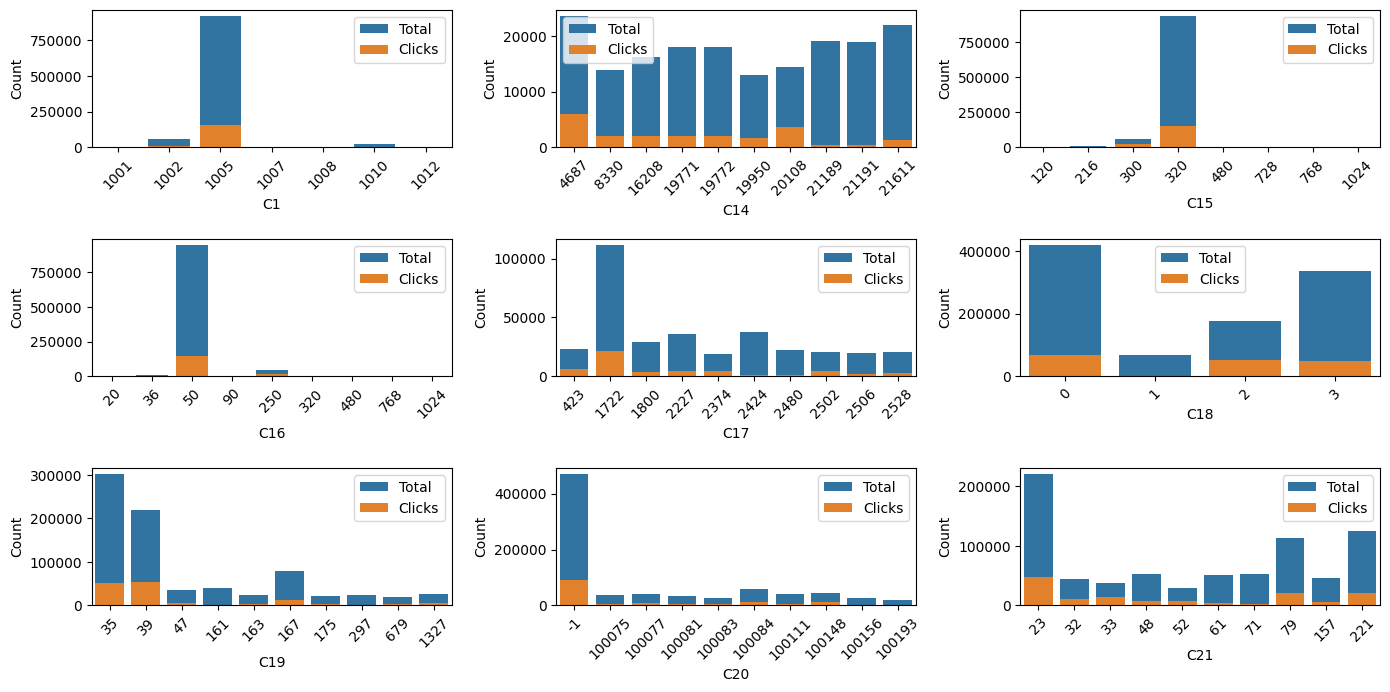

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

plt.figure(figsize=(14, 20))

for i, feature in enumerate(features):
    plt.subplot(len(features), 3, i + 1)

    # get the top 10 most common values for the feature
    top10 = df[feature].value_counts().nlargest(10).index

    # plot the total count for the top 10 most common values
    total_counts = df[df[feature].isin(top10)][feature].value_counts().reindex(top10)
    sns.barplot(x=total_counts.index, y=total_counts.values, label='Total')

    # plot the click count for the top 10 most common values
    click_counts = df[(df[feature].isin(top10)) & (df['click'] == 1)][feature].value_counts().reindex(top10)
    sns.barplot(x=click_counts.index, y=click_counts.values, label='Clicks')

    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()

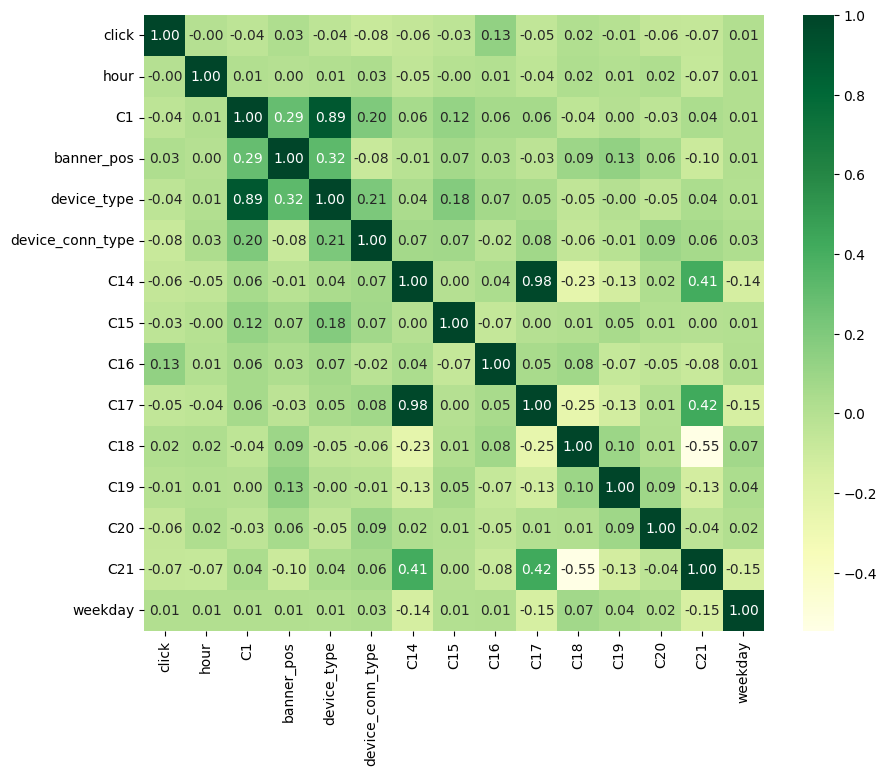

In [28]:
plt.figure(figsize=(10,8))
numerical_df = df[df.select_dtypes(include=['int64']).columns.tolist()]
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='YlGn')
plt.show()

## Modeling

### Baseline Models

In [29]:
!pip -q install category_encoders
import category_encoders
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.2 MB/s eta 0:00:00


In [30]:
df_numeric = df.drop(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model'], axis=1)
X_numeric_cols = df_numeric.drop(['click'], axis=1)
y_numeric_cols = df_numeric['click']

In [31]:
target_encoder = category_encoders.TargetEncoder()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric_cols, y_numeric_cols, stratify=y_numeric_cols, test_size=0.2, random_state= 42)

X_train = target_encoder.fit_transform(X_train, y_train)
X_test = target_encoder.transform(X_test)

In [33]:
def evaluate_model(model, X_test, y_test):
    """
    a function to evaluate the model performance
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cnf_matrix = confusion_matrix(y_test, y_pred)

    pred_prob = model.predict_proba(X_test)[:, 1]
    logloss = log_loss(y_test, pred_prob)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print("Accuracy: ", accuracy, "\n")
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("F1 Score: ", f1, "\n")
    print("Confusion matrix: \n", cnf_matrix, "\n")
    print(f"Log Loss: {logloss:.4f}")

In [34]:
df

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
0,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,2,4687,320,50,423,2,39,100148,32,2
1,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,07d7df22,...,0,17894,320,50,2039,2,39,100077,32,3
2,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,0,22684,320,50,2619,1,163,100055,71,0
3,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,0f2161f8,...,0,23222,320,50,2676,0,35,100176,221,2
4,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,07d7df22,...,0,8330,320,50,761,3,175,100081,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,2,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,0,19016,300,250,2162,2,39,-1,33,6
999996,1,1,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15701,320,50,1722,0,35,-1,79,1
999997,0,18,1005,1,f61eaaae,6b59f079,f028772b,ecad2386,7801e8d9,07d7df22,...,0,16615,320,50,1863,3,39,-1,23,3
999998,0,8,1005,1,57ef2c87,bd6d812f,f028772b,ecad2386,7801e8d9,07d7df22,...,0,19772,320,50,2227,0,935,-1,48,2


In [35]:
lr_base = LogisticRegression(max_iter=300)
lr_base.fit(X_train, y_train)
evaluate_model(lr_base, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.8287 

Recall:  0.0037947873154086016
Precision:  0.24618320610687022
F1 Score:  0.0074743612028506864 

Confusion matrix: 
 [[165611    395]
 [ 33865    129]] 

Log Loss: 0.4444


In [36]:
rf_base = RandomForestClassifier(bootstrap=True,  max_depth=25, n_estimators=30, n_jobs=4, random_state=0)
rf_base.fit(X_train, y_train)
evaluate_model(lr_base, X_test, y_test)

Accuracy:  0.8287 

Recall:  0.0037947873154086016
Precision:  0.24618320610687022
F1 Score:  0.0074743612028506864 

Confusion matrix: 
 [[165611    395]
 [ 33865    129]] 

Log Loss: 0.4444


In [37]:
xgb = XGBClassifier(n_estimators=23, max_depth=16, learning_rate=0.07, objective='binary:logistic')
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test)

Accuracy:  0.83196 

Recall:  0.035741601459081014
Precision:  0.5944227005870841
F1 Score:  0.06742882512903046 

Confusion matrix: 
 [[165177    829]
 [ 32779   1215]] 

Log Loss: 0.4178


### Feature Engineering

In [38]:
def my_target_encode(xtrain, ytrain, xtest):
    target_encoder = category_encoders.TargetEncoder()
    X_train = target_encoder.fit_transform(xtrain, ytrain)
    X_test = target_encoder.transform(xtest)
    return X_train, X_test

In [39]:
df.drop(["C1", "C14", "C20", "device_id", "device_ip"], axis=1, inplace=True)

In [40]:
X = df.drop(['click'], axis=1)
y = df['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state= 42)
X_train, X_test = my_target_encode(X_train, y_train, X_test)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
lr_base = LogisticRegression(max_iter=1000)
lr_base.fit(X_train, y_train)
evaluate_model(lr_base, X_test, y_test)

Accuracy:  0.832035 

Recall:  0.07321880331823263
Precision:  0.5438059864540091
F1 Score:  0.12906069326696223 

Confusion matrix: 
 [[163918   2088]
 [ 31505   2489]] 

Log Loss: 0.4073


In [43]:
rf_base = RandomForestClassifier(bootstrap=True,  max_depth=25, n_estimators=30, n_jobs=4, random_state=0)
rf_base.fit(X_train, y_train)
evaluate_model(rf_base, X_test, y_test)

Accuracy:  0.82635 

Recall:  0.12069777019474025
Precision:  0.45884589577275775
F1 Score:  0.19112166946152412 

Confusion matrix: 
 [[161167   4839]
 [ 29891   4103]] 

Log Loss: 0.4377


In [44]:
xgb = XGBClassifier(n_estimators=23, max_depth=16, learning_rate=0.07, objective='binary:logistic')
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test)

Accuracy:  0.833925 

Recall:  0.06386421133141143
Precision:  0.6093179904574797
F1 Score:  0.11561093804084459 

Confusion matrix: 
 [[164614   1392]
 [ 31823   2171]] 

Log Loss: 0.4035


### Grid Searching

In [45]:
cv = 2

lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 10],
    'solver': ['liblinear'],
    'max_iter': [200, 300]
}

lr_candid = lr_base
lr_grid_search = GridSearchCV(estimator=lr_candid, param_grid=lr_param_grid,
                           cv=cv, n_jobs=-1, verbose=2)

lr_grid_search.fit(X_train, y_train)

# output the best parameters
best_params_lr = lr_grid_search.best_params_
print("Best parameters:", best_params_lr)

# use the best parameters for the model
best_lr = LogisticRegression(**best_params_lr, random_state=42)

best_lr.fit(X_train, y_train)

evaluate_model(best_lr, X_test, y_test)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters: {'C': 0.001, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.832115 

Recall:  0.07454256633523564
Precision:  0.5448290690174156
F1 Score:  0.13114245051106224 

Confusion matrix: 
 [[163889   2117]
 [ 31460   2534]] 

Log Loss: 0.4074


In [46]:
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10],
}
cv = 2

rf_candid = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_candid, param_grid=rf_param_grid,
                              cv=cv, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# similarly output the best parameters
best_params_rf = rf_grid_search.best_params_
print("Best parameters:", best_params_rf)

# out best model
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)
evaluate_model(best_rf, X_test, y_test)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters: {'max_depth': 10, 'n_estimators': 50}
Accuracy:  0.83496 

Recall:  0.07363064070130022
Precision:  0.622636815920398
F1 Score:  0.13168832535381703 

Confusion matrix: 
 [[164489   1517]
 [ 31491   2503]] 

Log Loss: 0.4002


In [47]:
xgb_param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 6],
    'objective': ['binary:logistic']
}

cv = 2

xgb_candid = xgb

xgb_grid_search = GridSearchCV(estimator=xgb_candid, param_grid=xgb_param_grid,
                               cv=cv, n_jobs=-1, verbose=2)

xgb_grid_search.fit(X_train, y_train)

best_params_xgb = xgb_grid_search.best_params_
print("Best parameters:", best_params_xgb)

best_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss', random_state=42)

best_xgb.fit(X_train, y_train)

evaluate_model(best_xgb, X_test, y_test)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'objective': 'binary:logistic'}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:40:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy:  0.834535 

Recall:  0.08180855445078543
Precision:  0.5966530787384682
F1 Score:  0.1438882421420256 

Confusion matrix: 
 [[164126   1880]
 [ 31213   2781]] 

Log Loss: 0.3988


In [48]:
importances = best_xgb.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

for feature, importance in zip(sorted_features, sorted_importances):
    print(feature, importance)

site_id 0.5228648
app_id 0.19111544
site_domain 0.03429635
device_model 0.026887788
device_type 0.026226418
C21 0.02579968
banner_pos 0.024287205
app_category 0.021355659
C15 0.018695753
C18 0.016962927
C17 0.014976882
C19 0.012632364
device_conn_type 0.012051126
app_domain 0.01193616
site_category 0.011275358
hour 0.010210388
C16 0.00987415
weekday 0.008551598
